# Time Series Forecasting with Neural Networks

## 1️⃣ Project Overview
This notebook forecasts Tesla (TSLA)/Moderna (MRNA) stock prices using two deep learning models: a Feedforward Neural Network and an LSTM Neural Network. It includes step-by-step explanations and an interactive Gradio app.


[*********************100%***********************]  1 of 1 completed

Epoch 1/40



C:\users\19163\OneDrive\desktop\my_nlp_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0905 - val_loss: 0.0350
Epoch 2/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0229 - val_loss: 0.0305
Epoch 3/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0196 - val_loss: 0.0267
Epoch 4/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0199 - val_loss: 0.0258
Epoch 5/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0185 - val_loss: 0.0308
Epoch 6/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0202 - val_loss: 0.0262
Epoch 7/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0188 - val_loss: 0.0246
Epoch 8/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0186 - val_loss: 0.0277
Epoch 9/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0182 - val_loss: 0.0243
Epoch 10/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0185 - val_loss: 0.0234
Epoch 11/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0178 - val_loss: 0.0229
Epoch 12/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0170 - val_loss: 0.0249


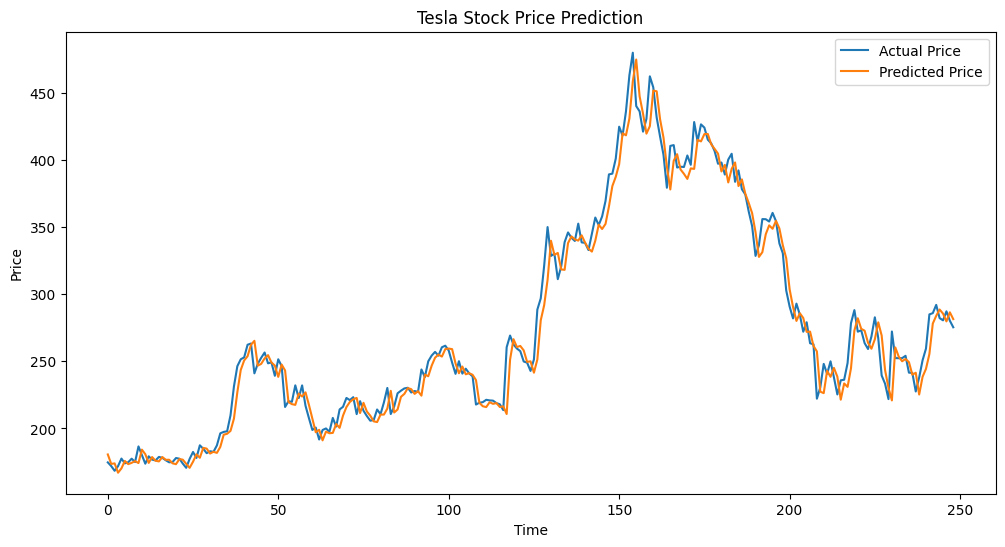

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted Closing Price for Tomorrow: $276.11


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf

# Fetch historical stock data for Tesla (TSLA)
stock_symbol = 'TSLA'
data = yf.download(stock_symbol, period='5y', interval='1d')

# Use only the 'Close' price for prediction
data = data[['Close']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Function to create dataset
def create_dataset(data, look_back=10):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 10
X, y = create_dataset(data_scaled, look_back)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build Simple Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(look_back,)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Ensure the output layer is linear
])

# Compile model
model.compile(optimizer='adam', loss='mean_absolute_error')

# Train the model
epochs = 40
batch_size = 16
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# Predict on test data
y_pred = model.predict(X_test)

# Inverse transform predictions
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

# Calculate MAE
mae = mean_absolute_error(y_test_inv, y_pred_inv)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Plot actual vs predicted prices
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Actual Price')
plt.plot(y_pred_inv, label='Predicted Price')
plt.legend()
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

# Predict tomorrow's closing price
last_lookback = data_scaled[-look_back:].reshape(1, look_back)
tomorrow_pred = model.predict(last_lookback)
tomorrow_price = scaler.inverse_transform(tomorrow_pred.reshape(-1, 1))

print(f"Predicted Closing Price for Tomorrow: ${tomorrow_price[0][0]:.2f}")

[*********************100%***********************]  1 of 1 completed

Epoch 1/40



C:\users\19163\OneDrive\desktop\my_nlp_env\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1468 - val_loss: 0.0463
Epoch 2/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0319 - val_loss: 0.0404
Epoch 3/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0347 - val_loss: 0.0398
Epoch 4/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0328 - val_loss: 0.0373
Epoch 5/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0278 - val_loss: 0.0441
Epoch 6/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0285 - val_loss: 0.0328
Epoch 7/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0312 - val_loss: 0.0330
Epoch 8/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0251 - val_loss: 0.0355
Epoch 9/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0245 - val_loss: 0.0286
Epoch 10/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0229 - val_loss: 0.0274
Epoch 11/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0207 - val_loss: 0.0273
Epoch 12/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0206 - val_l

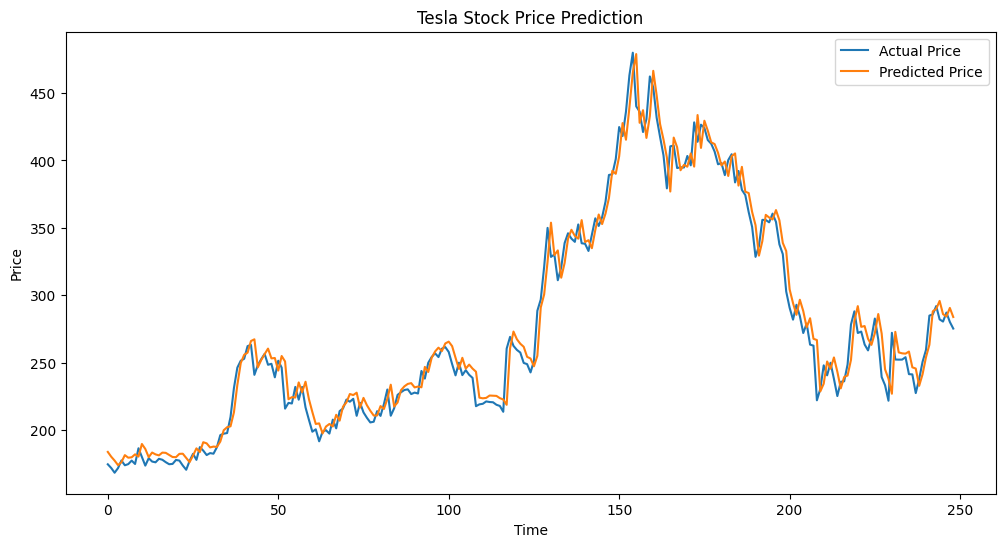

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted Opening Price for Tomorrow: $279.99


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import yfinance as yf

# Fetch historical stock data for TESLA (TSLA)
stock_symbol = 'TSLA'
data = yf.download(stock_symbol, period='5y', interval='1d')

# Use only the 'Close' price for prediction
data = data[['Close']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Function to create dataset
def create_dataset(data, look_back=10):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 10
X, y = create_dataset(data_scaled, look_back)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape input to be [samples, time steps, features] for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(look_back, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# Compile model
model.compile(optimizer='adam', loss='mean_absolute_error')

# Train the model
epochs = 40
batch_size = 16
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# Predict on test data
y_pred = model.predict(X_test)

# Inverse transform predictions
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

# Calculate MAE
mae = mean_absolute_error(y_test_inv, y_pred_inv)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Plot actual vs predicted prices
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Actual Price')
plt.plot(y_pred_inv, label='Predicted Price')
plt.legend()
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

# Predict tomorrow's opening price
last_lookback = data_scaled[-look_back:].reshape(1, look_back, 1)
tomorrow_pred = model.predict(last_lookback)
tomorrow_price = scaler.inverse_transform(tomorrow_pred.reshape(-1, 1))

print(f"Predicted Opening Price for Tomorrow: ${tomorrow_price[0][0]:.2f}")


[*********************100%***********************]  1 of 1 completed

Epoch 1/30



C:\users\19163\OneDrive\desktop\my_nlp_env\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.1319 - val_loss: 0.0113
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0334 - val_loss: 0.0156
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0467 - val_loss: 0.0197
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0340 - val_loss: 0.0116
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0271 - val_loss: 0.0149
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0270 - val_loss: 0.0119
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0290 - val_loss: 0.0181
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0257 - val_loss: 0.0102
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0226 - val_loss: 0.0088
Epoch 10/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0239 - val_loss: 0.0161
Epoch 11/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0221 - val_loss: 0.0079
Epoch 12/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0219 - val_l

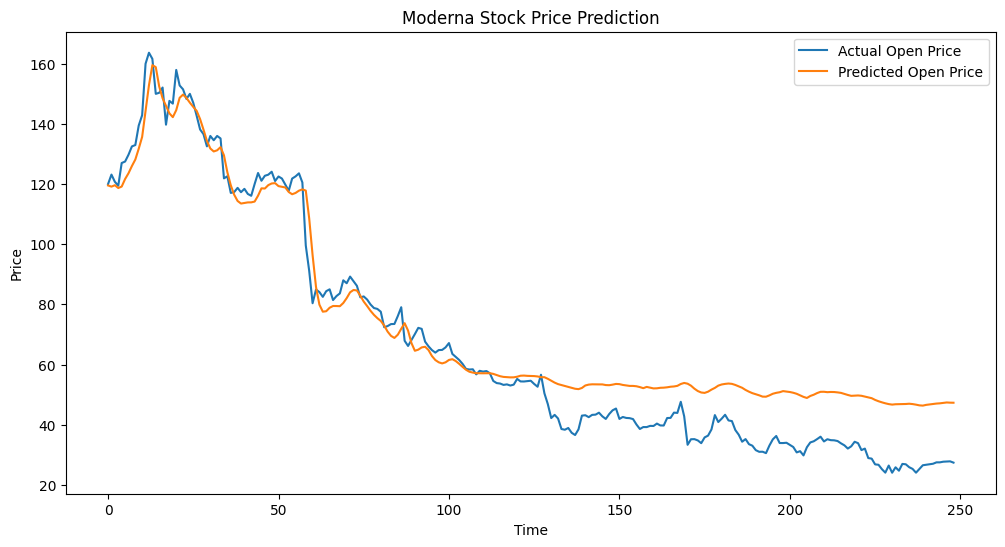

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted Opening Price for Tomorrow: $46.89


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import yfinance as yf

# Fetch historical stock data for Moderna (MRNA)
stock_symbol = 'MRNA'
data = yf.download(stock_symbol, period='5y', interval='1d')

# Use relevant features for prediction
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Function to create dataset
def create_dataset(data, look_back=10):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), :])  # Use all columns as input features
        y.append(data[i + look_back, 0])  # Predict 'Open' price
    return np.array(X), np.array(y)

look_back = 10
X, y = create_dataset(data_scaled, look_back)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape input to be [samples, time steps, features] for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Build LSTM Model with Dropout to prevent overfitting
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(look_back, X_train.shape[2])),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)
])

# Compile model
model.compile(optimizer='adam', loss='mean_absolute_error')

# Train the model
epochs = 30
batch_size = 32
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# Predict on test data
y_pred = model.predict(X_test)

# Inverse transform predictions
y_test_inv = scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], data.shape[1] - 1)))))[:, 0]
y_pred_inv = scaler.inverse_transform(np.hstack((y_pred.reshape(-1, 1), np.zeros((y_pred.shape[0], data.shape[1] - 1)))))[:, 0]

# Calculate MAE
mae = mean_absolute_error(y_test_inv, y_pred_inv)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Plot actual vs predicted prices
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Actual Open Price')
plt.plot(y_pred_inv, label='Predicted Open Price')
plt.legend()
plt.title('Moderna Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

# Predict tomorrow's opening price
last_lookback = data_scaled[-look_back:].reshape(1, look_back, X_train.shape[2])
tomorrow_pred = model.predict(last_lookback)
tomorrow_price = scaler.inverse_transform(np.hstack((tomorrow_pred.reshape(-1, 1), np.zeros((tomorrow_pred.shape[0], data.shape[1] - 1)))))[:, 0]

print(f"Predicted Opening Price for Tomorrow: ${tomorrow_price[0]:.2f}")
